<a href="https://colab.research.google.com/github/Ankushsaini90/Airbnb-data-analysis/blob/main/ANKUSH_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi df.csv</b> - the training set (contains 1458644 trip records)


### data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
# importing some important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing data
df = pd.read_csv('/content/NYC Taxi Data.csv')

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# checking type of data
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
#Convert timestamp to datetime format 
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [ ]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [ ]:
# Assign new columns to the dframe such as pickup_day, month
df['pickup_day'] = pd.DatetimeIndex(df['pickup_datetime']).day
df['pickup_hour'] = pd.DatetimeIndex(df['pickup_datetime']).hour
#df['dropoff_day'] = pd.DatetimeIndex(df['pickup_datetime']).day
df['pickup_month'] = pd.DatetimeIndex(df['pickup_datetime']).month
#df['dropoff_month'] = pd.DatetimeIndex(df['pickup_datetime']).month
df['weekday'] = pd.DatetimeIndex(df['pickup_datetime']).weekday

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_hour,pickup_month,weekday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,17,3,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,0,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,11,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,19,4,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,26,13,3,5


In [ ]:
#pip install mpu
import mpu

In [ ]:
#Creating a function to calcuate distance by co-ordinates
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return round(mpu.haversine_distance(pickup, drop),2)

In [ ]:
#Calculate distance and assign new column to the dataframe.
df['distance'] = df.apply(lambda x: calc_distance(x), axis = 1)

In [ ]:
df.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_hour,pickup_month,weekday,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,17,3,0,1.50
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,0,6,6,1.81
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,11,1,1,6.39


In [ ]:
# checking null values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_day            0
pickup_hour           0
pickup_month          0
weekday               0
distance              0
dtype: int64

*we don't have any null value.*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_day          1458644 non-null  int64         
 12  pickup_hour         1458644 non-null  int64         
 13  pickup_month

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day,pickup_hour,pickup_month,weekday,distance
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,1.550402e+01,1.360648e+01,3.516818e+00,3.050375e+00,3.440864e+00
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,8.703135e+00,6.399693e+00,1.681038e+00,1.954039e+00,4.296543e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,8.000000e+00,9.000000e+00,2.000000e+00,1.000000e+00,1.230000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,1.500000e+01,1.400000e+01,4.000000e+00,3.000000e+00,2.090000e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,2.300000e+01,1.900000e+01,5.000000e+00,5.000000e+00,3.880000e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,3.100000e+01,2.300000e+01,6.000000e+00,6.000000e+00,1.240910e+03


#### EDA

## Id column

In [ ]:
df['id'].nunique()

1458644

# Observation

1.   All id values are unique.



## Passenger count

Text(0.5, 1.0, 'number of passenger')

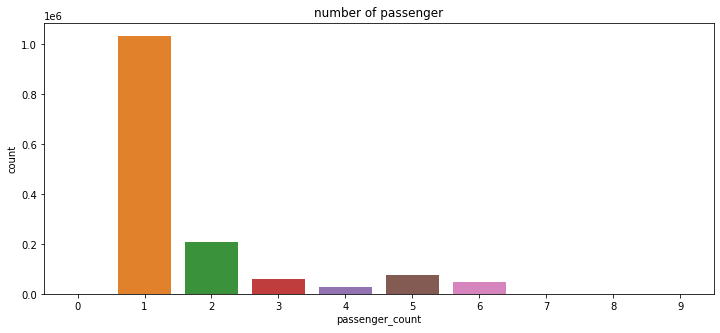

In [ ]:
# ploting graph for passenger_count
plt.figure(figsize=(12,5))
vis=sns.countplot(x=df['passenger_count'])
plt.title('number of passenger')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Passenger Count Distribution')

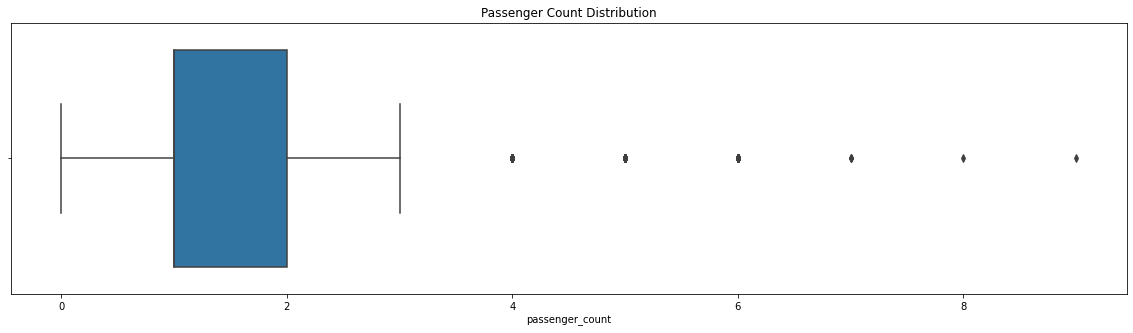

In [ ]:
# ploting boxplot graph 
plt.figure(figsize=(20,5))
sns.boxplot(df['passenger_count'])
plt.title('Passenger Count Distribution')

In [ ]:
no_of_passenger = df['passenger_count'].value_counts()
no_of_passenger

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

# Observation

1.   Most of the trip consist 1 or 2 passenger. 
2.   There are also some trips with 0 passenger count. 



**WE will remove the records with passenger count > 7 and replacing passenger count 0 with 1**

In [ ]:
df['passenger_count'] = df.passenger_count.map(lambda x: 1 if x == 0 else x)
df = df[df.passenger_count <=6]

In [ ]:
df.passenger_count.value_counts()

1    1033600
2     210318
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

Text(0.5, 1.0, 'number of passenger')

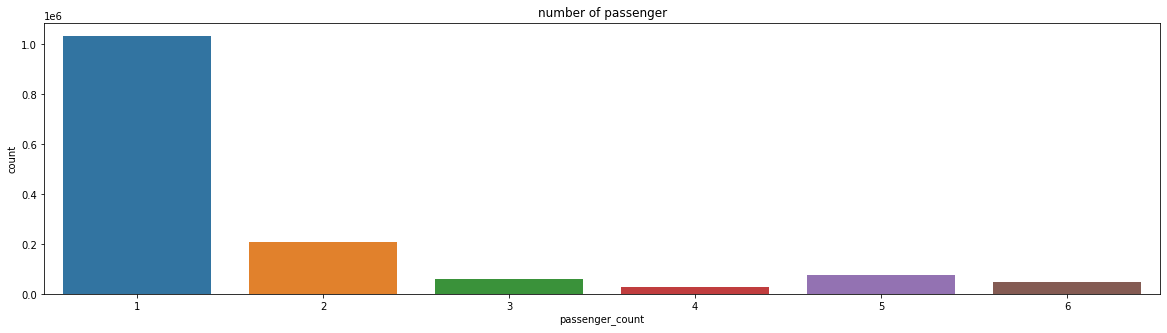

In [ ]:
plt.figure(figsize=(20,5))
vis=sns.countplot(x=df['passenger_count'])
plt.title('number of passenger')

## Vendor

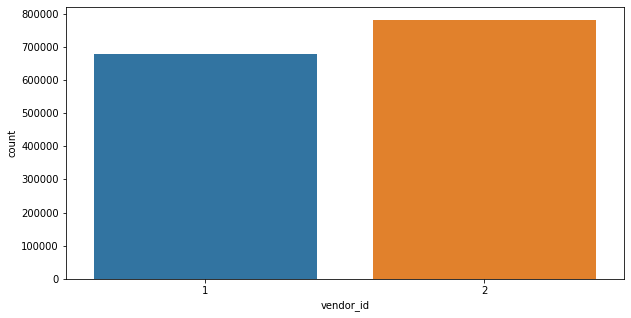

In [ ]:
# ploting graph for vendor id
plt.figure(figsize=(10,5))
vis=sns.countplot(x=df['vendor_id'])

# Observation


*   Vendor 2 is evidently more famous among the population.



## Pickup  data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


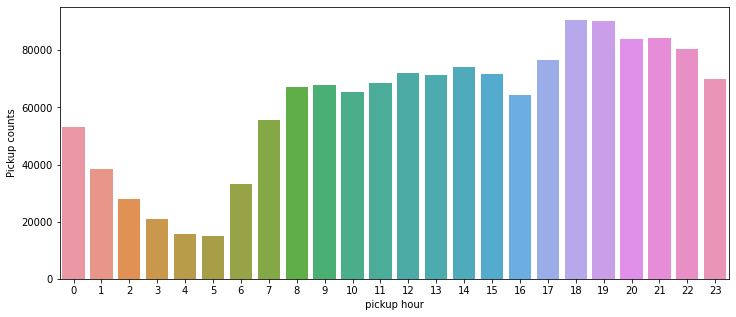

In [ ]:
# based on hours
plt.figure(figsize = (12,5))
sns.countplot(df.pickup_hour)
plt.xlabel(' pickup hour ')
plt.ylabel('Pickup counts')
plt.show()

# Observation

*   Most of pickups at between 5 PM to 9 PM.
*   Some taxi also pickup at 5 AM and 6 AM .



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


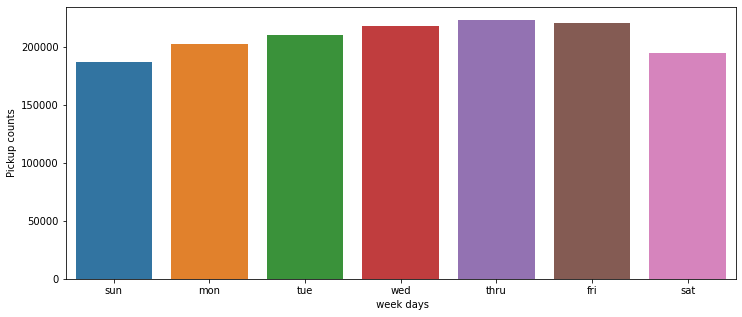

In [ ]:
# For weekday
plt.figure(figsize = (12,5))
sns.countplot(df.weekday)
plt.xticks([0,1,2,3,4,5,6], labels=['sun','mon','tue','wed','thru','fri','sat'])
plt.xlabel(' week days')
plt.ylabel('Pickup counts')
plt.show()

In [ ]:
df['weekday'].value_counts()

4    223531
5    220867
3    218574
2    210136
1    202748
6    195365
0    187418
Name: weekday, dtype: int64

#Observaation

*   Here we can see that Fridays and Saturdays are those days in a week when peoples prefer to rome in the city.




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Monthly trips')

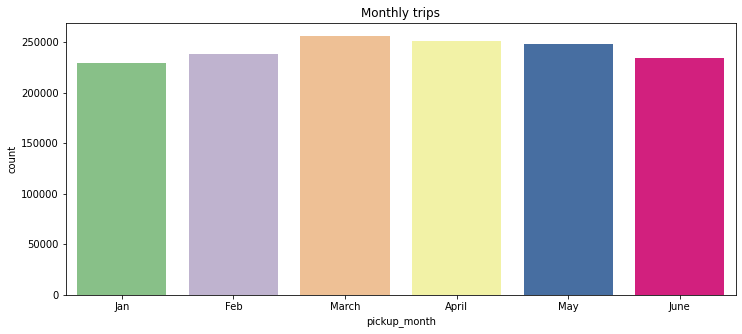

In [ ]:
# for months
plt.figure(figsize=(12,5))
sns.countplot(df['pickup_month'], palette='Accent')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','March','April','May','June'])
plt.title('Monthly trips')

#observation

*   We've data of 6 months.
*   Number of trips in a particular month - March and April marking the highest.




## Distance




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


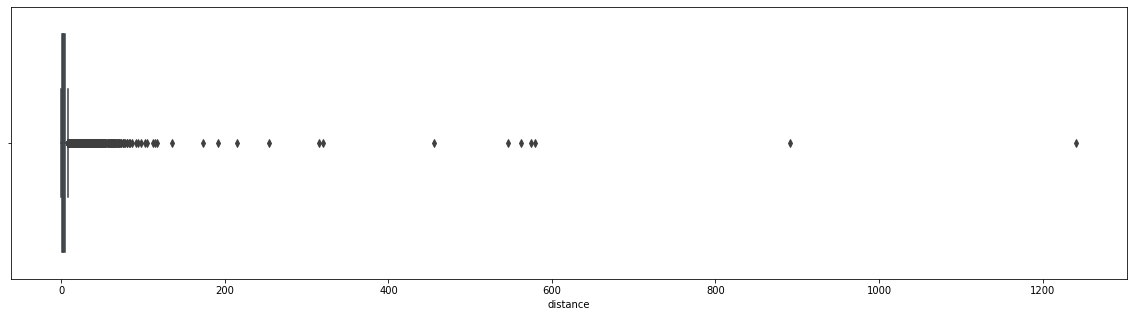

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(df.distance)
plt.show()

In [ ]:
df.distance.describe()

count    1.458639e+06
mean     3.440872e+00
std      4.296546e+00
min      0.000000e+00
25%      1.230000e+00
50%      2.090000e+00
75%      3.880000e+00
max      1.240910e+03
Name: distance, dtype: float64

# Observation

*   Average distance travelled is approx 3.5 kms.
*   Most of the trips are limited to the range of 1-10 kms.



## Trip duration

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


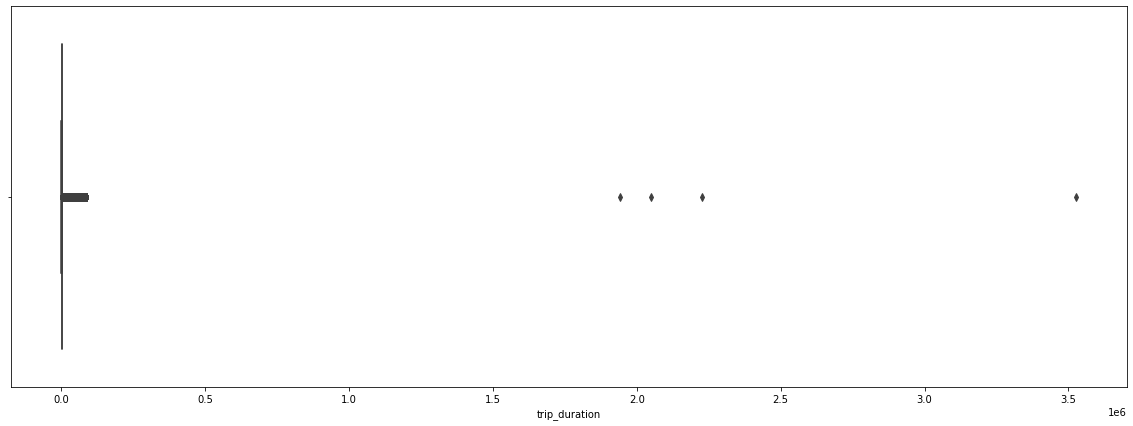

In [ ]:
plt.figure(figsize = (20,7))
sns.boxplot(df.trip_duration)
plt.show()

In [ ]:
df['trip_duration'].describe()

count    1.458639e+06
mean     9.594951e+02
std      5.237440e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [ ]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,max(df.trip_duration),3600))).count()

trip_duration
(1, 3601]             1446308
(3601, 7201]            10045
(7201, 10801]             141
(10801, 14401]             35
(14401, 18001]              5
                       ...   
(3506401, 3510001]          0
(3510001, 3513601]          0
(3513601, 3517201]          0
(3517201, 3520801]          0
(3520801, 3524401]          0
Name: trip_duration, Length: 979, dtype: int64

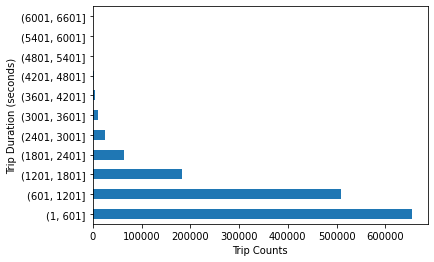

In [ ]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,7200,600))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

# observation

*   Most of the ride are of 10 min.



## Store and fwd flag

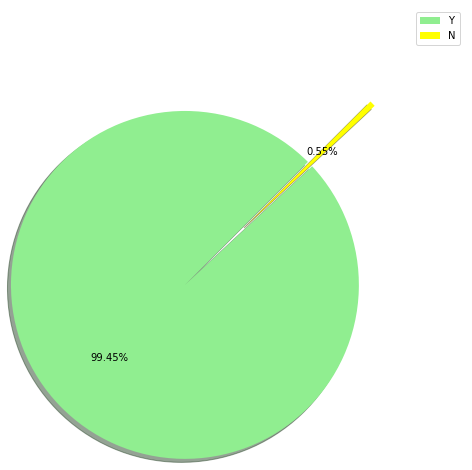

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df['store_and_fwd_flag'].value_counts(),colors=['lightgreen', 'yellow'],shadow=True,explode=[0.5,0], autopct='%1.2f%%', startangle=45)
plt.legend(labels=['Y','N'])
plt.show()

In [ ]:
df['store_and_fwd_flag'].value_counts()

N    1450594
Y       8045
Name: store_and_fwd_flag, dtype: int64

# Observation


*   There were very few trips (0.55%) of which the records were not stored in memory.



##Trip Duration per hour

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


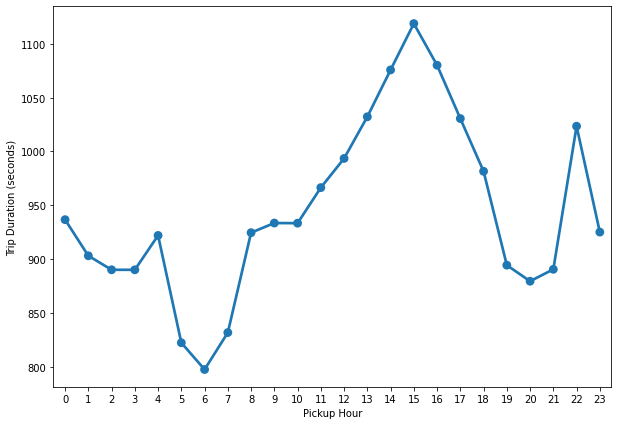

In [ ]:
plt.figure(figsize=(10,7))
vis = df.groupby('pickup_hour').trip_duration.mean()
sns.pointplot(vis.index, vis.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.show()

# Observation
Average trip duration is lowest at 6 AM when there is minimal traffic on the roads.

Average trip duration is generally highest around 3 PM during the busy streets.

Trip duration on an average is similar during early morning hours

## Trip duration per month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


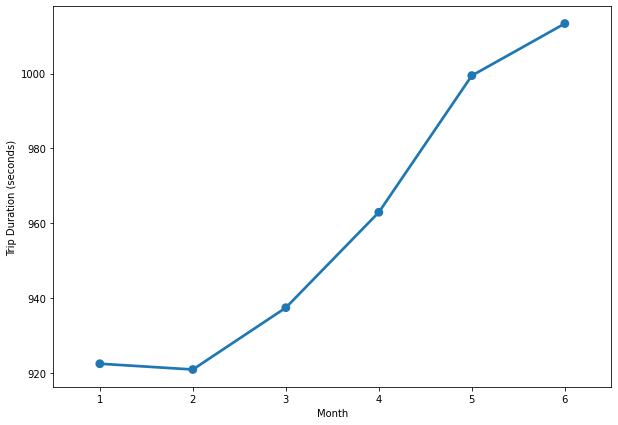

In [ ]:
plt.figure(figsize=(10,7))
vis2 = df.groupby('pickup_month').trip_duration.mean()
sns.pointplot(vis2.index, vis2.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Month')
plt.show()

# Observation


*   It is lowest during february when winters starts declining.
*   We can see an increasing trend in the average trip duration along with each subsequent month. 
*   The duration difference between each month is not much. It has increased gradually over a period of 6 months.






## Trip duration per vendor

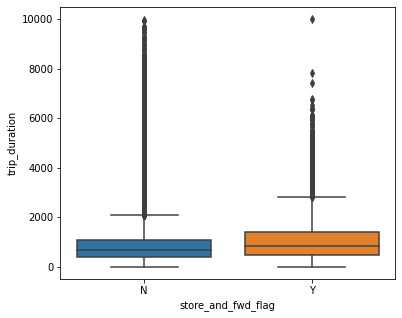

In [ ]:
plt.figure(figsize = (6,5))
vis3 = df.loc[(df.trip_duration < 10000)]
sns.boxplot(x = "store_and_fwd_flag", y = "trip_duration", data = vis3)
plt.show()

# Observation


*   Trip duration is longer for the trips where the flag is not set.
*   Inter quartile range of trip duration is more for the trips with the flag 'Y' as compared to the trips with flag 'N'.

*   The median value is almost equal for both.






## Distance per hour

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


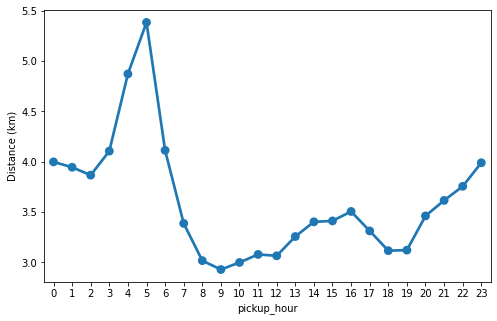

In [ ]:
plt.figure(figsize = (8,5))
vis4 = df.groupby('pickup_hour').distance.mean()
sns.pointplot(vis4.index, vis4.values)
plt.ylabel('Distance (km)')
plt.show()

# Observation

*   Trip distance is highest during early morning hours.
*   Possible reason behind this is Outstation trips taken during the weekends. 

*   Trip distance is fairly equal from morning till the evening






## Distance per week day

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


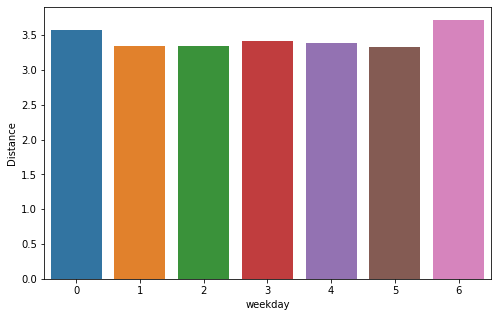

In [ ]:
plt.figure(figsize = (8,5))
vis5 = df.groupby('weekday').distance.mean()
sns.barplot(vis5.index, vis5.values)
plt.ylabel('Distance')
plt.show()

# Observation

*    Sunday being at the top may be due to outstation trips or night trips.



## Distance Per month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


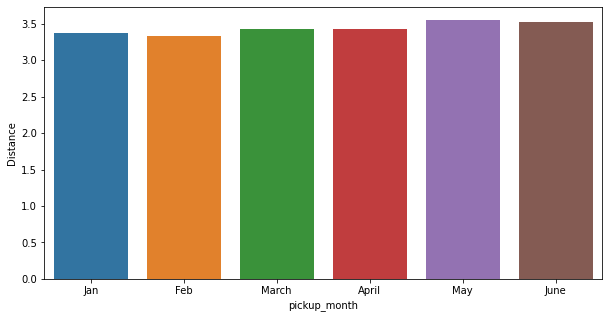

In [ ]:
plt.figure(figsize = (10,5))
vis6 = df.groupby('pickup_month').distance.mean()
sns.barplot(vis6.index, vis6.values)
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','March','April','May','June'])
plt.ylabel('Distance')
plt.show()

# Observation

*   Here also the distibution is almost equivalent, varying mostly around 3.25 km/h. 




## Distance per flag

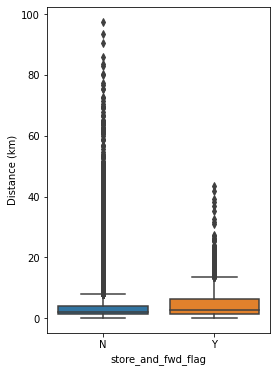

In [ ]:
plt.figure(figsize = (4,6))
plot_dist = df.loc[(df.distance < 100)]
sns.boxplot(x = "store_and_fwd_flag", y = "distance", data = plot_dist)
plt.ylabel('Distance (km)')
plt.show()

# Observation

*   Interquartile range of distance is almost twice for Flag 'Y' trips as compared to the Flag 'N' trips.
*   Median value is much different in both the case as well.



## Distance v/s Trip duration

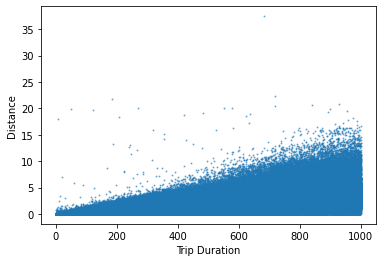

In [ ]:
dur_dist = df.loc[(df.distance < 50) & (df.trip_duration < 1000), ['distance','trip_duration']]
plt.scatter(dur_dist.trip_duration, dur_dist.distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()

# Observation


*   There should have been a linear relationship between the distance covered and trip duration on an average.



In [ ]:
import plotly.express as px

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'pickup_hour', 'pickup_month', 'weekday',
       'distance'],
      dtype='object')

## Pickup Locations

In [ ]:
pip install basemap

In [ ]:
def location_point(set):
    # Import package for map
    from mpl_toolkits.basemap import Basemap
    plt.figure(figsize = (20,20))

    # Set the limits of the map to the minimum and maximum coordinates
    lat_min = df["pickup_latitude"].min() - .2
    lat_max = df["pickup_latitude"].max() + .2
    lon_min = df["pickup_longitude"].min() - .2
    lon_max = df["pickup_longitude"].max() + .2

    # Set the center of the map
    cent_lat = (lat_min + lat_max) / 2
    cent_lon = (lon_min + lon_max) / 2

    #Create the Basemap object with required params.
    map = Basemap(llcrnrlon=lon_min,
                  llcrnrlat=lat_min,
                  urcrnrlon=lon_max,
                  urcrnrlat=lat_max,
                  resolution='l',
                  projection='tmerc',
                  lat_0 = cent_lat,
                  lon_0 = cent_lon)

    #Style the map
    map.drawmapboundary()
    map.drawcoastlines()
    map.fillcontinents()
    map.drawcountries(linewidth=2)
    map.drawstates()


    #Fetch the long and lat in form of array
    long = np.array(df["pickup_longitude"])
    lat = np.array(df["pickup_latitude"])

    x, y = map(long, lat)
    map.plot(x, y,'ro', markersize=2, alpha=1)

    plt.show()



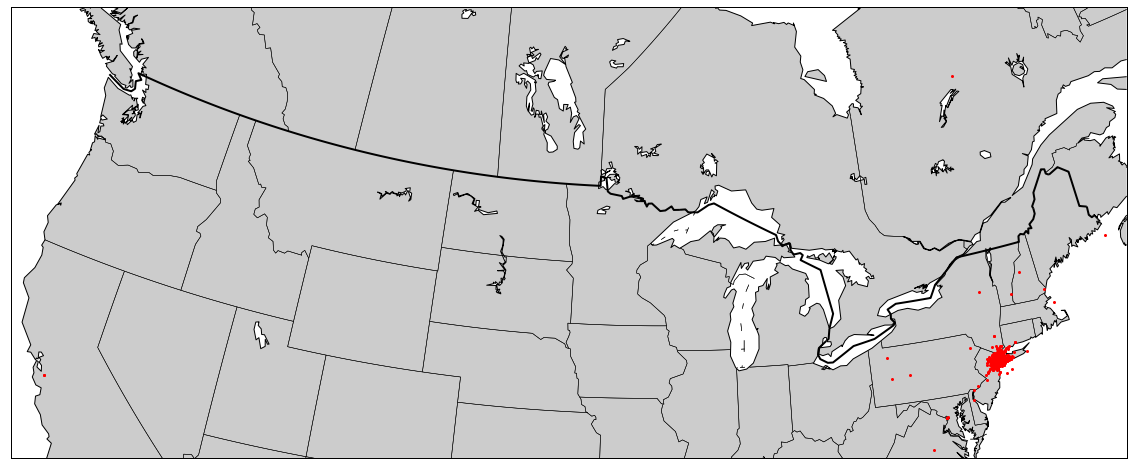

In [ ]:
location_point(df)

# Observation


*   There are quite a few pickup from the neighbouring state as well. Some are quite far and some very near to the NYC state.



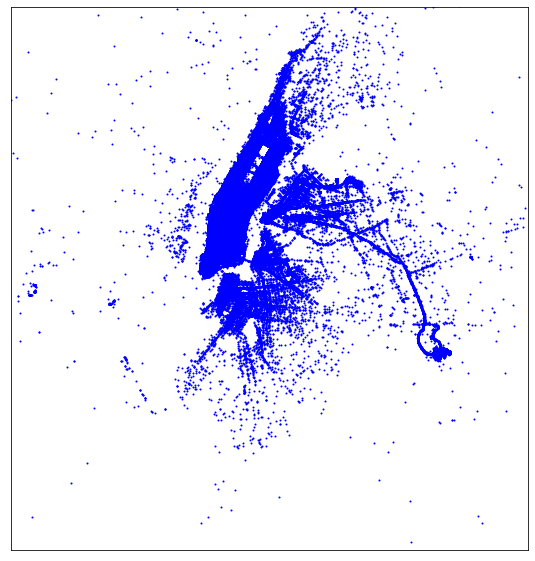

In [ ]:
plt.figure(figsize=(10,10))

from mpl_toolkits.basemap import Basemap

# Set the limits of the map to the minimum and maximum coordinates
lat_min = 40.5
lat_max = 40.9
lon_min = -74.2
lon_max = -73.7

# Set the center of the map
cent_lat = (lat_min + lat_max) / 2
cent_lon = (lon_min + lon_max) / 2

#Create the Basemap object with required params.
map = Basemap(llcrnrlon=lon_min,
              llcrnrlat=lat_min,
              urcrnrlon=lon_max,
              urcrnrlat=lat_max,
              resolution='l',
              projection='tmerc',
              lat_0 = cent_lat,
              lon_0 = cent_lon)

#Style the map
# map.drawcounties()

#Fetch the long and lat in form of array
long = np.array(df["pickup_longitude"])
lat = np.array(df["pickup_latitude"])

x, y = map(long, lat)
map.plot(x, y,'bo', markersize=1, alpha=1)
plt.xticks()
plt.show()

# Observation


*   We can see that most of the taxi pickups were done in the manhattan area as compared to the other areas in NYC.
*   A long trail towards the airport shows that the airport is situated quite far from the Manhattan area.








## Correlation

Text(0.5, 1.0, 'Correlation Plot')

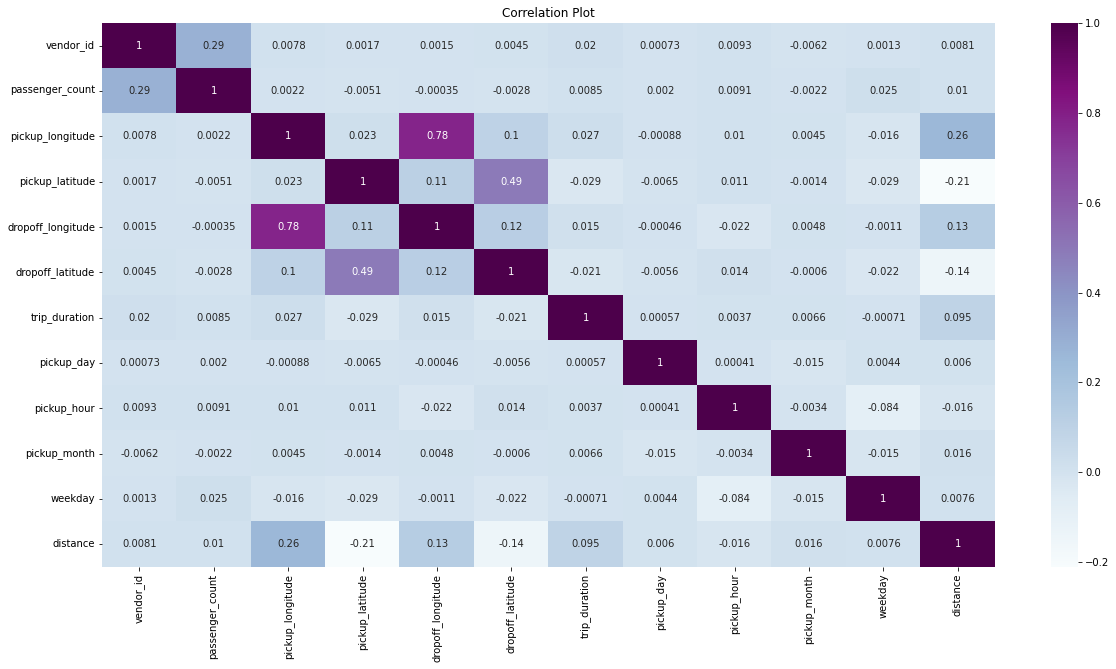

In [ ]:
#Plotting Correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="BuPu")
plt.title('Correlation Plot')

In [ ]:
# dorping some unnecessary columns
new_df = df.drop(['id','pickup_longitude','pickup_latitude','dropoff_longitude', 'dropoff_latitude','dropoff_datetime','pickup_datetime'],axis=1)

In [ ]:
new_df.head(5)

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_day,pickup_hour,pickup_month,weekday,distance
0,2,1,N,455,14,17,3,0,1.50
1,1,1,N,663,12,0,6,6,1.81
2,2,1,N,2124,19,11,1,1,6.39
3,2,1,N,429,6,19,4,2,1.49
4,2,1,N,435,26,13,3,5,1.19


In [ ]:
## label encoding
new_df['store_and_fwd_flag']= new_df['store_and_fwd_flag'].replace(to_replace = ['Y','N'],value = ['1','0'])

In [ ]:
new_df['store_and_fwd_flag'].value_counts()

0    1450594
1       8045
Name: store_and_fwd_flag, dtype: int64

In [ ]:
new_df.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_day,pickup_hour,pickup_month,weekday,distance
0,2,1,0,455,14,17,3,0,1.50
1,1,1,0,663,12,0,6,6,1.81
2,2,1,0,2124,19,11,1,1,6.39
3,2,1,0,429,6,19,4,2,1.49
4,2,1,0,435,26,13,3,5,1.19


In [ ]:
new_df.dtypes

vendor_id               int64
passenger_count         int64
store_and_fwd_flag     object
trip_duration           int64
pickup_day              int64
pickup_hour             int64
pickup_month            int64
weekday                 int64
distance              float64
dtype: object

## Creating Module

In [ ]:
# Spliting Predictors and Target Variable

X = new_df.drop(['trip_duration'], axis=1)
y = np.log(new_df['trip_duration'])

In [ ]:
#importing some important metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1166911, 8), (291728, 8), (1166911,), (291728,))

In [ ]:
#implementing Linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred

array([6.10660897, 6.30714118, 6.22056614, ..., 6.11724539, 6.33849524,
       6.48083845])

In [ ]:
#intercept
lr.intercept_

5.936299566262306

In [ ]:
# coficient
lr.coef_

array([ 0.01813729,  0.007602  ,  0.0140692 ,  0.00069374,  0.00572992,
        0.01764689, -0.01153509,  0.10802952])

In [ ]:
#Examining 

print ("Training Score : " , lr.score(X_train, y_train))
print ("Validation Score : ", lr.score(X_test, y_test))
print ("R2_Score : ", r2_score(lr_pred, y_test))

#print ("Cross Validation Score : " , cross_val_score(lr, X_train, y_train, cv=5).mean())
#print ("RMSLE : ", np.sqrt(mean_squared_log_error(lr_pred, y_test)))

Training Score :  0.33708933648466
Validation Score :  0.31267005992004904
R2_Score :  -0.9057413826115102


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0.5, 1.0, 'Test VS Prediction')

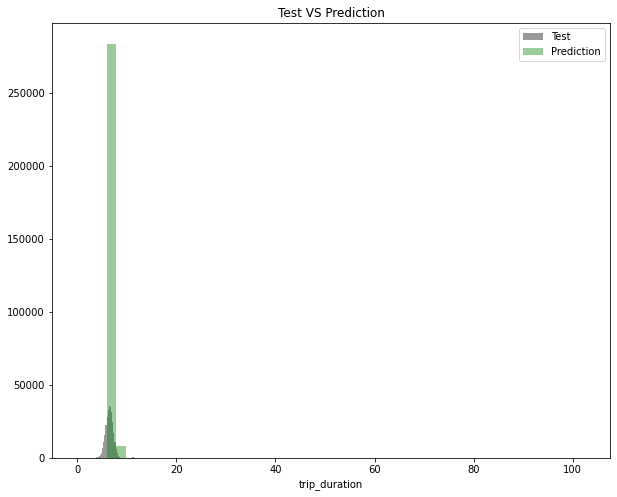

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color="g", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

# Observation 

*   Model is not working well in leaner regression.



## Let's try Decision Tree

In [ ]:
#decision tree implementation
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


array([5.31019631, 6.65757802, 4.99371282, ..., 5.75280522, 6.11590304,
       7.00175844])

In [ ]:
#examining 

print ("Training Score : " , dt.score(X_train, y_train))
print ("Validation Score : ",dt.score(X_test, y_test))
print ("R2_Score : ", r2_score(dt_pred, y_test))

#print ("Cross Validation Score : " , cross_val_score(dt, X_train, y_train, cv=5).mean())
#print ("RMSLE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))

Training Score :  0.6581233778355289
Validation Score :  0.6469134096906399
R2_Score :  0.4645563777133145


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 1.0, 'Test VS Prediction')

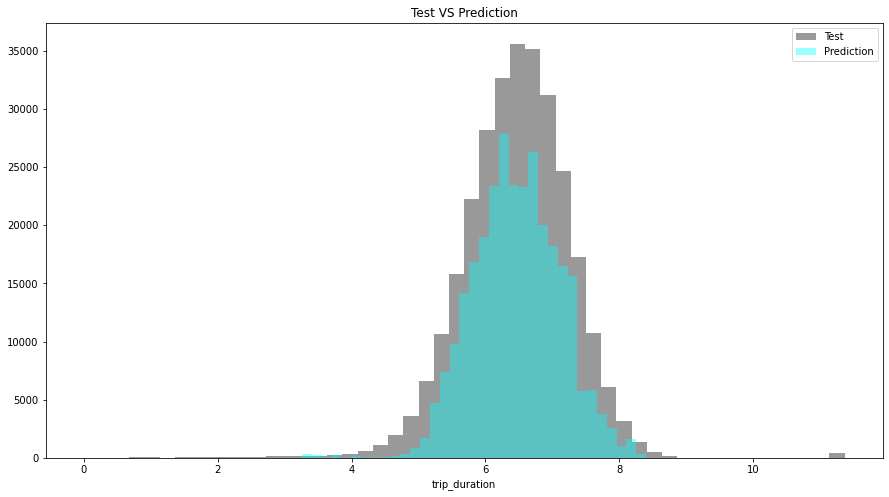

In [ ]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="cyan", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

# Observation

This model is working verr well compare to linear regression.




## Now Let's try Random forest

In [ ]:
#random forest implementation
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_pred

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


array([5.30965084, 6.68029607, 5.09667263, ..., 5.70569198, 6.08997477,
       6.97490651])

In [ ]:
#examining metrics 

print ("Training Score : " , rf.score(X_train, y_train))
print ("Validation Score : ", rf.score(X_test, y_test))
print ("R2_Score : ", r2_score(rf_pred, y_test))
#print ("Cross Validation Score : " , cross_val_score(rf, X_train, y_train, cv=5).mean())
#print ("RMSLE : ", np.sqrt(mean_squared_log_error(rf_pred, y_test)))

Training Score :  0.661140994376077
Validation Score :  0.6502387251375603
R2_Score :  0.46661733228104296


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 1.0, 'Test VS Prediction')

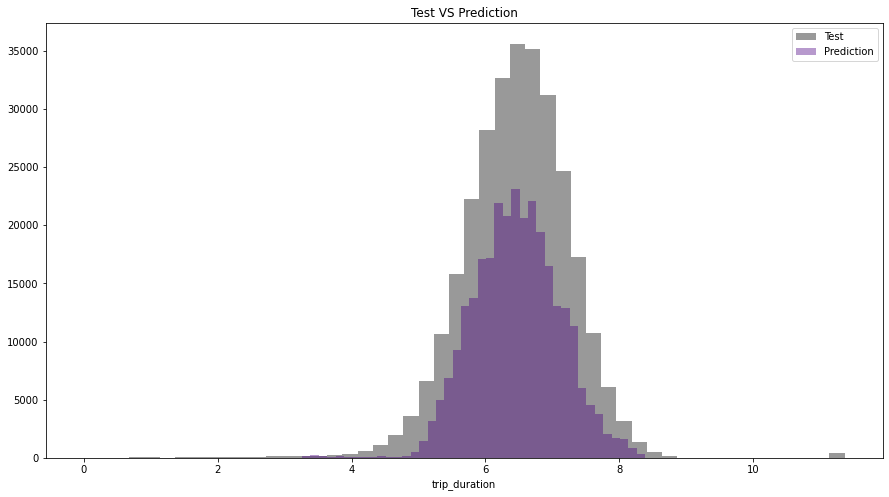

In [ ]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(rf_pred, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

# Observation 

This model is working similar to decision tree.

## Over all Conclusion

---



Most of the trip consist 1 or 2 passenger.

Vendor 2 is evidently more famous among the population.

Most of pickups at betwwen 5 PM to 9 PM.

Here we can see that Fridays and Saturdays are those days in a week when peoples prefer to rome in the city.

Average distance travelled is approx 3.5 kms.

Most of the trips are limited to the range of 1-10 kms.

Most of the ride are of 10 min.

There were very few trips (0.55%) of which the records were stored in memory.

Average trip duration is lowest at 6 AM when there is minimal traffic on the roads.

The duration difference between each month is not much. It has increased gradually over a period of 6 months

Trip duration is longer for the trips where the flag is not set.

Inter quartile range of trip duration is more for the trips with the flag 'Y' as compared to the trips with flag 'N'.

The median value is almost equal for both.

Trip distance is highest during early morning hours.

Possible reasone behind this is Outstation trips taken during the weekends.

Trip distance is fairly equal from morning till the evening

Sunday being at the top may be due to outstation trips or night trips.

Here also the distibution is almost equivalent, varying mostly around 3.25 km/h.

Interquartile range of distance is almost twice for Flag 'Y' trips as compared to the Flag 'N' trips.

Median value is much different in both the case as well.

We can see that most of the taxi pickups were done in the manhattan area as compared to the other areas in NYC.

